Hello, here I am doing some analysis and EDA on the 2021 Hospital Discharge Data public use data file. This is the most recent data on the website https://www.dshs.texas.gov/thcic/hospitals/Inpatientpudf.shtm
In this notebook, I'm going to map out the various locations of hospitals. The unfortunate thing about 2021 data is that it only contains q1 2021 discharge data so my information is only up to early 2021.

I wanted to take on this project and all the data engineering and data analysis work in order to really practice in those areas. I also really wanted to gain some experience working with Time Series data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('data/IP_Stat_2021.xlsx')

In [3]:
# df['COUNTY'].unique()

In [4]:
len(df['COUNTY'].unique())

#so seemingly, there are 182 counties which just have a numerical code. Pretty unfortunate.

183

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   THCIC_ID       699 non-null    object
 1   Hospital_name  699 non-null    object
 2   Hospital_city  699 non-null    object
 3   COUNTY         699 non-null    object
 4   q1             699 non-null    object
 5   end of list    699 non-null    object
dtypes: object(6)
memory usage: 32.9+ KB


In [6]:
df[df['Hospital_name'] == 'Memorial Hospital']

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,end of list
201,199000,Memorial Hospital,Dumas,341,169,end of list
279,103000,Memorial Hospital,Gonzales,177,164,end of list
587,113000,Memorial Hospital,Seminole,165,300,end of list


In [7]:
# 3 Different Memorial Hospitals in different counties

In [8]:
df['Hospital_city'].value_counts()


Houston           47
San Antonio       40
Dallas            30
Austin            26
Fort Worth        21
                  ..
Seminole           1
Colorado City      1
Borger             1
Eastland           1
Mount Pleasant     1
Name: Hospital_city, Length: 272, dtype: int64

In [9]:
df.drop(698, inplace=True)

In [10]:
q1_numeric = df['q1']  
q1_numeric = pd.to_numeric(q1_numeric)

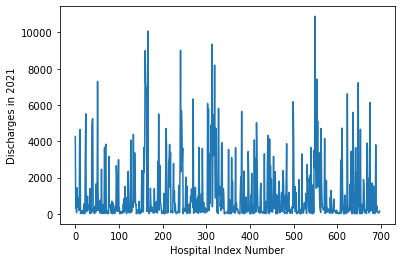

In [11]:
q1_numeric.plot()
plt.xlabel('Hospital Index Number')
plt.ylabel('Discharges in 2021');

In [12]:
df['THCIC_ID'].describe()

count        698
unique       698
top       865000
freq           1
Name: THCIC_ID, dtype: object

There was a hospital which had 10.9k discharges. There were 698 hospitals listed by the Texas Department of State Health Services in 2021. The mean number of discharges was 1051. The median number of discharges was 245. There is a tail to the right of really big hospitals which dealt with many patients and discharges. For example, the hospital which had 10.9k discharges.  There was also 4 hospitals which had only 1 discharge. They were Trinity Hospital in Houston, Cochran Memorial Hospital in Morton, St. Michaels Elite Hospital in Sugar Land, and  CHRISTUS Mother Frances Hospital in Tyler. GIS mapping will help visualize this better.

In [13]:
q1_numeric.describe()

count      698.000000
mean      1051.356734
std       1685.068734
min          1.000000
25%         88.250000
50%        245.000000
75%       1292.750000
max      10891.000000
Name: q1, dtype: float64

In [14]:
q1_numeric.max()

10891

In [15]:
df.iloc[342]

THCIC_ID                   975247
Hospital_name    Trinity Hospital
Hospital_city             Houston
COUNTY                        201
q1                              1
end of list          end of list 
Name: 342, dtype: object

In [16]:
df.iloc[460]

THCIC_ID                            159000
Hospital_name    Cochran Memorial Hospital
Hospital_city                       Morton
COUNTY                                 079
q1                                       1
end of list                   end of list 
Name: 460, dtype: object

In [17]:
df.iloc[615]

THCIC_ID                             975411
Hospital_name    St Michaels Elite Hospital
Hospital_city                    Sugar Land
COUNTY                                  157
q1                                        1
end of list                    end of list 
Name: 615, dtype: object

In [18]:
df.iloc[652]

THCIC_ID                                               975202
Hospital_name    CHRISTUS Mother Frances Hospital-South Tyler
Hospital_city                                           Tyler
COUNTY                                                    423
q1                                                          1
end of list                                      end of list 
Name: 652, dtype: object

Here, I am now beginning to work on 2005 hospital data. This dataset loaded with discharges per quarter, so I'm just going to aggregate them into an annual discharge number. The good thing about this year's data is that the county is labeled rather than given a numerical code.

In [19]:
df_05 = pd.read_excel('data/HospitalStatistics2005.xls')
df_05['Total Discharges'] = df_05['1q05 Inpatient Discharges'] + df_05['2q05 Inpatient Discharges'] + \
df_05['3q05 Inpatient Discharges'] + df_05['4q05 Inpatient Discharges']

In [20]:
df_05['Total Discharges'].isna().sum()

64

In [21]:
df_05

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q05 Inpatient Discharges,2q05 Inpatient Discharges,3q05 Inpatient Discharges,4q05 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2358.0,2309.0,2209.0,2188.0,9064.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4707.0,4369.0,4447.0,4314.0,17837.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,67.0,51.0,50.0,57.0,225.0
3,782700,Abilene Psychiatric Center,Abilene,Taylor,153.0,169.0,203.0,199.0,724.0
4,818500,West Texas Hospital,Abilene,Taylor,NaN,NaN,45.0,82.0,NaN
...,...,...,...,...,...,...,...,...,...
511,781400,Winnie Community Hospital,Winnie,Chambers,183.0,137.0,124.0,75.0,519.0
512,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,317.0,271.0,250.0,261.0,1099.0
513,569000,Tyler County Hospital,Woodville,Tyler,NaN,463.0,204.0,203.0,NaN
514,726900,Barix Clinics-Texas,Wylie,Collin,33.0,41.0,33.0,31.0,138.0


So it turns out there are 64 hospitals which has NaN values for 2005 data. There were 516 unique THCIC ID's meaning that complete annual discharge data is available for 452 hospitals. Over the years, new ones were definitely built. THCIC stands for Texas Health Care Information Collection (THCIC).

In [22]:
len(df_05['Hospital name'].unique())

# Hard to trust this line because of duplicate naming of hospitals that are located in different cities.

505

In [23]:
len(df_05['THCIC_ID'].unique())

516

In [24]:
len(df_05['Hospital city'].unique())

# so there is data for hospitals in 191 cities.

191

In [25]:
len(df_05['Hospital county'].unique())

# those 191 cities reside in 126 counties.

126

In [26]:
df_05.isna().sum()

# 64 hospitals are missing data from >=1 quarter, with as many as 50 hospitals missing data from q1 of 2005.

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q05 Inpatient Discharges    50
2q05 Inpatient Discharges    35
3q05 Inpatient Discharges    20
4q05 Inpatient Discharges    15
Total Discharges             64
dtype: int64

In [27]:
tx_largest_05 = df_05.nlargest(5, ['Total Discharges'])
tx_largest_05

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q05 Inpatient Discharges,2q05 Inpatient Discharges,3q05 Inpatient Discharges,4q05 Inpatient Discharges,Total Discharges
121,474000,Parkland Memorial Hospital,Dallas,Dallas,13387.0,13421.0,14014.0,14196.0,55018.0
411,154000,Methodist Hospital,San Antonio,Bexar,10381.0,10047.0,10306.0,10548.0,41282.0
116,331000,Baylor University Medical Center,Dallas,Dallas,10384.0,10311.0,10314.0,10201.0,41210.0
199,102,UT Medical Branch Hospital,Galveston,Galveston,9429.0,9544.0,9588.0,9498.0,38059.0
181,235000,Texas Health Harris Methodist Hospital-Fort Worth,Fort Worth,Tarrant,9366.0,9411.0,9703.0,9545.0,38025.0


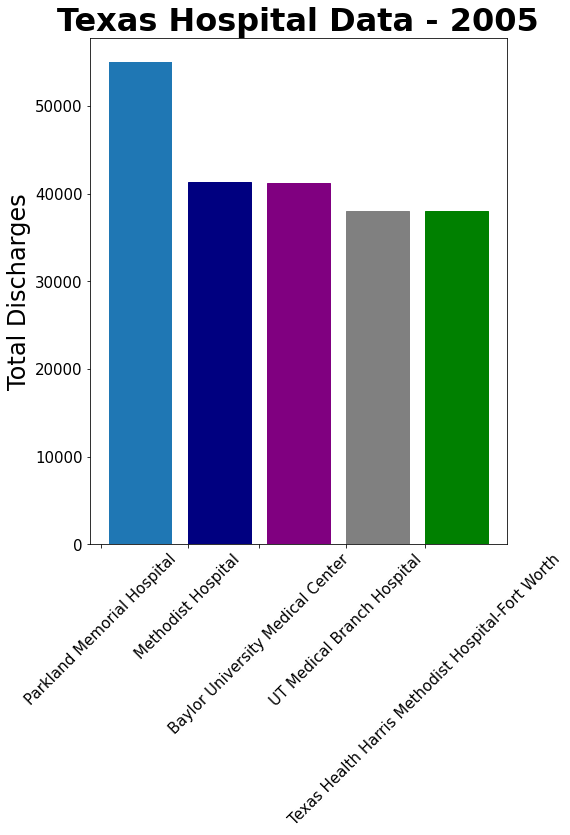

In [28]:
counts = tx_largest_05['Total Discharges']
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(tx_largest_05['Hospital name'],counts)
# barlist[0].set_color('green')
barlist[1].set_color('navy')
barlist[2].set_color('purple')
barlist[3].set_color('grey')
barlist[4].set_color('green')
ax.set_ylabel('Total Discharges', size=24)
plt.title("Texas Hospital Data - 2005", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.xticks([-0.5, 0.6, 1.5, 2.6, 3.6],rotation=45)
plt.show()

In [29]:
houston_hospitals_05 = df_05[df_05['Hospital city'] == 'Houston']
len(houston_hospitals_05)

56

In [30]:
htx_largest_05 = houston_hospitals_05.nlargest(5, ['Total Discharges'])
htx_largest_05

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q05 Inpatient Discharges,2q05 Inpatient Discharges,3q05 Inpatient Discharges,4q05 Inpatient Discharges,Total Discharges
238,347000,Memorial Hermann Hospital,Houston,Harris,8832.0,8910.0,8991.0,9093.0,35826.0
226,124000,Methodist Hospital,Houston,Harris,8894.0,8788.0,8768.0,8920.0,35370.0
224,118000,St Lukes Episcopal Hospital,Houston,Harris,8514.0,8935.0,8650.0,8901.0,35000.0
244,459000,Ben Taub General Hospital,Houston,Harris,7434.0,7562.0,7709.0,7950.0,30655.0
241,407000,Memorial Hermann Southwest Hospital,Houston,Harris,7039.0,6475.0,6949.0,7370.0,27833.0


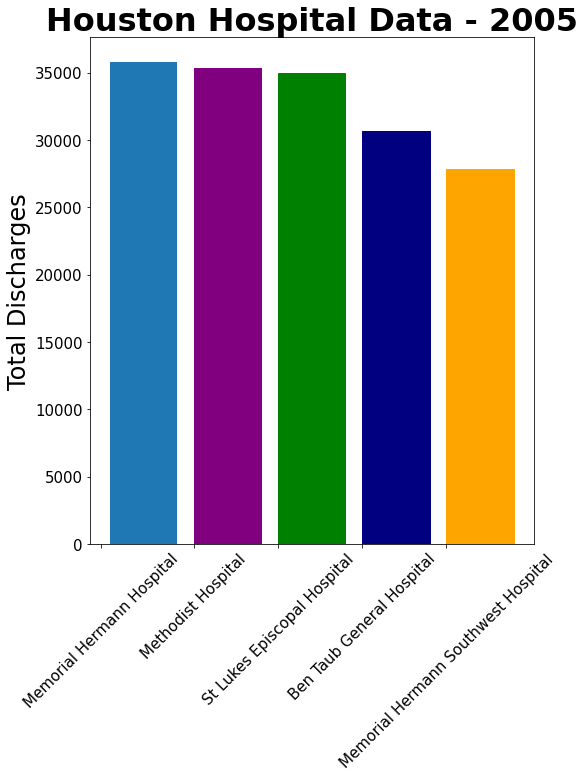

In [31]:
counts = htx_largest_05['Total Discharges']
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(htx_largest_05['Hospital name'],counts)
# barlist[0].set_color('green')
barlist[1].set_color('purple')
barlist[2].set_color('green')
barlist[3].set_color('navy')
barlist[4].set_color('orange')
ax.set_ylabel('Total Discharges', size=24)
plt.title("Houston Hospital Data - 2005", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.xticks([-0.5, 0.6, 1.6, 2.6, 3.6],rotation=45)
plt.show()

In [32]:
houston_hospitals_05.nsmallest(5, ['Total Discharges'])

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q05 Inpatient Discharges,2q05 Inpatient Discharges,3q05 Inpatient Discharges,4q05 Inpatient Discharges,Total Discharges
266,758000,Houston Hospital for Specialized Surgery,Houston,Harris,39.0,9.0,8.0,6.0,62.0
254,678000,Triumph Hospital-Central Houston,Houston,Harris,79.0,42.0,47.0,54.0,222.0
273,807000,CHRISTUS Dubuis Hospital-Houston,Houston,Harris,74.0,61.0,32.0,60.0,227.0
260,712500,HealthBridge Childrens Hospital-Houston,Houston,Harris,51.0,56.0,77.0,58.0,242.0
245,459001,Quentin Mease Community Hospital,Houston,Harris,83.0,91.0,82.0,69.0,325.0


In [33]:
houston_hospitals_05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 218 to 273
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   THCIC_ID                   56 non-null     int64  
 1   Hospital name              56 non-null     object 
 2   Hospital city              56 non-null     object 
 3   Hospital county            56 non-null     object 
 4   1q05 Inpatient Discharges  54 non-null     float64
 5   2q05 Inpatient Discharges  54 non-null     float64
 6   3q05 Inpatient Discharges  54 non-null     float64
 7   4q05 Inpatient Discharges  53 non-null     float64
 8   Total Discharges           52 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.4+ KB


I will now begin taking a look at 2006 hospital data. This will continue all the way up to 2020 and I will perform EDA, data cleaning, and data engineering. If possible, I will then combine these 15 years into a time series and perform further analysis.

In [34]:
df_06 = pd.read_excel('data/HospitalStatistics2006.xls')

In [35]:
# first thing to note is that there are now 23 more THCIC ID's, meaning data on 23 more hospitals. 

In [36]:
df_06['Total Discharges'] = df_06['1q06 Inpatient Discharges'] + df_06['2q06 Inpatient Discharges'] + \
df_06['3q06 Inpatient Discharges'] + df_06['4q06 Inpatient Discharges']

In [37]:
df_06.isna().sum()
# in this year, there are 43 hospitals which don't have complete data. Since I will aggregate by year later for the time series
# it won't matter too much that some hospitals are missing data for each year, or that new hospitals being built take away
# some patients from existing hospitals.

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q06 Inpatient Discharges    25
2q06 Inpatient Discharges    18
3q06 Inpatient Discharges    18
4q06 Inpatient Discharges    16
Total Discharges             43
dtype: int64

In [38]:
df_06['Total Discharges'].describe()

count      496.000000
mean      5765.905242
std       8130.184861
min         19.000000
25%        575.500000
50%       1757.500000
75%       8398.250000
max      59281.000000
Name: Total Discharges, dtype: float64

Taking a look at 2007 data now.

In [39]:
df_07 = pd.read_excel('data/HospitalStatistics2007.xls')
df_07['Total Discharges'] = df_07['1q07 Inpatient Discharges'] + df_07['2q07 Inpatient Discharges'] + \
df_07['3q07 Inpatient Discharges'] + df_07['4q07 Inpatient Discharges']
df_07

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q07 Inpatient Discharges,2q07 Inpatient Discharges,3q07 Inpatient Discharges,4q07 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2329.0,2331.0,2232.0,2382.0,9274.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4278.0,4101.0,4361.0,4479.0,17219.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,56.0,58.0,58.0,64.0,236.0
3,818500,West Texas Hospital,Abilene,Taylor,85.0,NaN,NaN,NaN,NaN
4,846000,Acadia Abilene,Abilene,Taylor,226.0,243.0,270.0,324.0,1063.0
...,...,...,...,...,...,...,...,...,...
554,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,64.0,67.0,84.0,68.0,283.0
555,781400,Winnie Community Hospital,Winnie,Chambers,168.0,138.0,123.0,132.0,561.0
556,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,211.0,181.0,156.0,169.0,717.0
557,569000,Tyler County Hospital,Woodville,Tyler,235.0,232.0,NaN,NaN,NaN


In [40]:
df_08 = pd.read_excel('data/HospitalStatistics2008.xls')
df_08['Total Discharges'] = df_08['1q08 Inpatient Discharges'] + df_08['2q08 Inpatient Discharges'] + \
df_08['3q08 Inpatient Discharges'] + df_08['4q08 Inpatient Discharges']
df_08

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q08 Inpatient Discharges,2q08 Inpatient Discharges,3q08 Inpatient Discharges,4q08 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2594.0,2214.0,2303.0,2196.0,9307.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4135.0,4166.0,4312.0,4267.0,16880.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,60.0,49.0,57.0,45.0,211.0
3,846000,Acadia Abilene,Abilene,Taylor,24.0,355.0,359.0,363.0,1101.0
4,689400,CHRISTUS Spohn Hospital Alice-Laviana,Alice,Jim Wells,50.0,50.0,54.0,55.0,209.0
...,...,...,...,...,...,...,...,...,...
537,709001,Red River Hospital,Wichita Falls,Wichita,364.0,384.0,399.0,360.0,1507.0
538,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,69.0,73.0,76.0,60.0,278.0
539,781400,Winnie Community Hospital,Winnie,Chambers,170.0,162.0,107.0,135.0,574.0
540,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,185.0,156.0,143.0,179.0,663.0


In [41]:
df_09 = pd.read_excel('data/HospitalStatistics2009.xls')
df_09['Total Discharges'] = df_09['1q09 Inpatient Discharges'] + df_09['2q09 Inpatient Discharges'] + \
df_09['3q09 Inpatient Discharges'] + df_09['4q09 Inpatient Discharges']
df_09

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q09 Inpatient Discharges,2q09 Inpatient Discharges,3q09 Inpatient Discharges,4q09 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2243.0,2313.0,2265.0,2620.0,9441.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4500.0,4133.0,4274.0,4290.0,17197.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,46.0,47.0,54.0,49.0,196.0
3,846000,Acadia Abilene,Abilene,Taylor,353.0,363.0,365.0,347.0,1428.0
4,689400,CHRISTUS Spohn Hospital Alice-Laviana,Alice,Jim Wells,47.0,44.0,41.0,47.0,179.0
...,...,...,...,...,...,...,...,...,...
540,709001,Red River Hospital,Wichita Falls,Wichita,375.0,420.0,430.0,418.0,1643.0
541,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,66.0,65.0,50.0,65.0,246.0
542,781400,Winnie Community Hospital,Winnie,Chambers,116.0,110.0,113.0,136.0,475.0
543,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,190.0,191.0,182.0,172.0,735.0


In [42]:
df_10 = pd.read_excel('data/HospitalStatistics2010_Q4.xls')
df_10['Total Discharges'] = df_10['1q10 Inpatient Discharges'] + df_10['2q10 Inpatient Discharges'] + \
df_10['3q10 Inpatient Discharges'] + df_10['4q10 Inpatient Discharges']
df_10

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q10 Inpatient Discharges,2q10 Inpatient Discharges,3q10 Inpatient Discharges,4q10 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2293.0,2283.0,2327.0,2222.0,9125.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4269.0,4057.0,4112.0,4165.0,16603.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,41.0,38.0,47.0,47.0,173.0
3,846000,Acadia Abilene,Abilene,Taylor,391.0,436.0,418.0,400.0,1645.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,85.0,124.0,103.0,108.0,420.0
...,...,...,...,...,...,...,...,...,...
563,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,65.0,53.0,60.0,59.0,237.0
564,781400,Winnie Community Hospital,Winnie,Chambers,141.0,138.0,136.0,132.0,547.0
565,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,107.0,NaN,NaN,NaN,NaN
566,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,68.0,198.0,214.0,204.0,684.0


In [43]:
df_11 = pd.read_excel('data/IP_Stat_2011.xls')
df_11['Total Discharges'] = df_11['1q11 Inpatient Discharges'] + df_11['2q11 Inpatient Discharges'] + \
df_11['3q11 Inpatient Discharges'] + df_11['4q11 Inpatient Discharges']
df_11

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q11 Inpatient Discharges,2q11 Inpatient Discharges,3q11 Inpatient Discharges,4q11 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2094.0,1965.0,1970.0,2048.0,8077.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4248.0,4060.0,4225.0,4064.0,16597.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,58.0,62.0,39.0,53.0,212.0
3,846000,Acadia Abilene,Abilene,Taylor,399.0,447.0,439.0,383.0,1668.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,116.0,126.0,94.0,105.0,441.0
...,...,...,...,...,...,...,...,...,...
571,685000,HEALTHSOUTH Rehab Hospital-Wichita Falls,Wichita Falls,Wichita,320.0,331.0,339.0,334.0,1324.0
572,709001,Red River Hospital,Wichita Falls,Wichita,433.0,512.0,459.0,438.0,1842.0
573,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,57.0,55.0,56.0,63.0,231.0
574,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,244.0,198.0,241.0,200.0,883.0


In [44]:
df_12 = pd.read_excel('data/IP_Stat_2012.xls')
df_12['Total Discharges'] = df_12['1q12 Inpatient Discharges'] + df_12['2q12 Inpatient Discharges'] + \
df_12['3q12 Inpatient Discharges'] + df_12['4q12 Inpatient Discharges']
df_12

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q12 Inpatient Discharges,2q12 Inpatient Discharges,3q12 Inpatient Discharges,4q12 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2226.0,2086.0,2145.0,2007.0,8464.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4400.0,4136.0,4298.0,4331.0,17165.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,59.0,48.0,56.0,39.0,202.0
3,846000,Acadia Abilene,Abilene,Taylor,473.0,451.0,550.0,566.0,2040.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,148.0,124.0,124.0,135.0,531.0
...,...,...,...,...,...,...,...,...,...
587,685000,HEALTHSOUTH Rehab Hospital-Wichita Falls,Wichita Falls,Wichita,347.0,326.0,316.0,330.0,1319.0
588,709001,Red River Hospital,Wichita Falls,Wichita,437.0,455.0,405.0,430.0,1727.0
589,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,65.0,67.0,58.0,54.0,244.0
590,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,207.0,158.0,166.0,165.0,696.0


In [45]:
df_13 = pd.read_excel('data/IP_Stat_2013.xlsx')
df_13 = df_13[['THCIC_ID', 'Hospital name', 'Hospital city', 'Hospital county', '1q13 Inpatient Discharges',\
             '2q13 Inpatient Discharges', '3q13 Inpatient Discharges', '4q13 Inpatient Discharges']]
df_13['Total Discharges'] = df_13['1q13 Inpatient Discharges'] + df_13['2q13 Inpatient Discharges'] + \
df_13['3q13 Inpatient Discharges'] + df_13['4q13 Inpatient Discharges']
df_13.drop(index=df_13.index[606],axis=0, inplace=True)
df_13

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q13 Inpatient Discharges,2q13 Inpatient Discharges,3q13 Inpatient Discharges,4q13 Inpatient Discharges,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,Taylor,2016.0,1904.0,1825.0,1643.0,7388.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4446.0,4219.0,4377.0,4361.0,17403.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,53.0,59.0,41.0,58.0,211.0
3,846000,Abilene Behavioral Health,Abilene,Taylor,503.0,533.0,441.0,412.0,1889.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,122.0,109.0,107.0,113.0,451.0
...,...,...,...,...,...,...,...,...,...
601,685000,HEALTHSOUTH Rehab Hospital-Wichita Falls,Wichita Falls,Wichita,309.0,299.0,287.0,297.0,1192.0
602,709001,Red River Hospital,Wichita Falls,Wichita,496.0,488.0,457.0,467.0,1908.0
603,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,61.0,59.0,75.0,52.0,247.0
604,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,163.0,191.0,163.0,131.0,648.0


In [46]:
df_14 = pd.read_excel('data/IP_Stat_2014.xls')
df_14.drop('End of listing', inplace=True, axis=1)
df_14['Total Discharges'] = df_14['1q14 Inpatient Discharges'] + df_14['2q14 Inpatient Discharges'] + \
df_14['3q14 Inpatient Discharges'] + df_14['4q14 Inpatient Discharges']
df_14.drop(index=df_14.index[637],axis=0, inplace=True)
df_14

,THCIC_ID,Hospital Name,Hospital City,Hospital County,1q14 Inpatient Discharges,2q14 Inpatient Discharges,3q14 Inpatient Discharges,4q14 Inpatient Discharges,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,Taylor,1789.0,1785.0,1744.0,1912.0,7230.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4405.0,4454.0,4303.0,4038.0,17200.0
2,846000,Abilene Behavioral Health,Abilene,Taylor,485.0,519.0,456.0,424.0,1884.0
3,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,137.0,122.0,118.0,121.0,498.0
4,973240,Oceans Behavioral Hospital Abilene,Abilene,Taylor,143.0,121.0,109.0,113.0,486.0
...,...,...,...,...,...,...,...,...,...
632,685000,HEALTHSOUTH Rehab Hospital-Wichita Falls,Wichita Falls,Wichita,319.0,317.0,273.0,307.0,1216.0
633,709001,Red River Hospital,Wichita Falls,Wichita,554.0,485.0,478.0,526.0,2043.0
634,973800,Promise Hospital of Wichita Falls,Wichita Falls,Wichita,NaN,42.0,62.0,64.0,NaN
635,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,166.0,139.0,145.0,124.0,574.0


In [47]:
df_15 = pd.read_excel('data/IP_Stat_2015.xls')
df_15

,THCIC_ID,Hospital Name,Hospital City,Hospital County,1q15 Inpatient Discharges,2q15 Inpatient Discharges,3q15 Inpatient Discharges,4q15 Inpatient Discharges,End of list
0,091001,Abilene Regional Medical Center,Abilene,Taylor,1969,1960,1939,1923,End of list
1,500000,Hendrick Medical Center,Abilene,Taylor,4150,4006,4163,4121,End of list
2,846000,Abilene Behavioral Health,Abilene,Taylor,347,393,415,448,End of list
3,920000,Healthsouth Rehab Hospital Abilene,Abilene,Taylor,124,130,130,107,End of list
4,973240,Oceans Behavioral Hospital Abilene,Abilene,Taylor,134,162,160,140,End of list
...,...,...,...,...,...,...,...,...,...
716,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,149,140,105,87,End of list
717,151000,North Runnels Hospital,Winters,Runnels,45,23,45,27,End of list
718,569000,Tyler County Hospital,Woodville,Tyler,133,120,110,101,End of list
719,023000,Yoakum Community Hospital,Yoakum,Lavaca,268,285,243,270,End of list


In [48]:
df_15 = pd.read_excel('data/IP_Stat_2015.xls')
df_15.drop('End of list', inplace=True, axis=1)
df_15.drop(index=df_15.index[720],axis=0, inplace=True)
df_15['Total Discharges'] = df_15['1q15 Inpatient Discharges'] + df_15['2q15 Inpatient Discharges'] + \
df_15['3q15 Inpatient Discharges'] + df_15['4q15 Inpatient Discharges']
df_15

,THCIC_ID,Hospital Name,Hospital City,Hospital County,1q15 Inpatient Discharges,2q15 Inpatient Discharges,3q15 Inpatient Discharges,4q15 Inpatient Discharges,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,Taylor,1969,1960,1939,1923,7791
1,500000,Hendrick Medical Center,Abilene,Taylor,4150,4006,4163,4121,16440
2,846000,Abilene Behavioral Health,Abilene,Taylor,347,393,415,448,1603
3,920000,Healthsouth Rehab Hospital Abilene,Abilene,Taylor,124,130,130,107,491
4,973240,Oceans Behavioral Hospital Abilene,Abilene,Taylor,134,162,160,140,596
...,...,...,...,...,...,...,...,...,...
715,781400,Winnie Community Hospital,Winnie,Chambers,93,77,72,76,318
716,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,149,140,105,87,481
717,151000,North Runnels Hospital,Winters,Runnels,45,23,45,27,140
718,569000,Tyler County Hospital,Woodville,Tyler,133,120,110,101,464


In [49]:
df_16 = pd.read_excel('data/IP_Stat_2016.xlsx')
df_16.drop('End of Titles', inplace=True, axis=1)
df_16.drop(index=df_16.index[729],axis=0, inplace=True)
df_16['Total Discharges'] = df_16['1q16 Inpatient Discharges'] + df_16['2q16 Inpatient Discharges'] + \
df_16['3q16 Inpatient Discharges'] + df_16['4q16 Inpatient Discharges']
df_16

,THCIC_ID,Hospital Name,Hospital City,Hospital County,1q16 Inpatient Discharges,2q16 Inpatient Discharges,3q16 Inpatient Discharges,4q16 Inpatient Discharges,Total Discharges
0,91001.0,Abilene Regional Medical Center,Abilene,Taylor,1811,1853,1825,1856,7345
1,500000.0,Hendrick Medical Center,Abilene,Taylor,4289,4377,4276,4300,17242
2,846000.0,Abilene Behavioral Health,Abilene,Taylor,429,593,NaN,NaN,NaN
3,920000.0,Healthsouth Rehab Hospital Abilene,Abilene,Taylor,184,192,170,191,737
4,973240.0,Oceans Behavioral Hospital Abilene,Abilene,Taylor,154,171,180,235,740
...,...,...,...,...,...,...,...,...,...
724,781400.0,Winnie Community Hospital,Winnie,Chambers,81,64,67,74,286
725,446001.0,Christus Mother Frances Hospital Winnsboro,Winnsboro,Wood,107,103,107,79,396
726,151000.0,North Runnels Hospital,Winters,Runnels,34,28,19,22,103
727,569000.0,Tyler County Hospital,Woodville,Tyler,129,124,93,103,449


In [50]:
df_17 = pd.read_excel('data/IP_Stat_2017.xlsx')
df_17.drop('End of Title List', inplace=True, axis=1)
df_17.drop(index=df_17.index[718],axis=0, inplace=True)
df_17['Total Discharges'] = df_17['q1'] + df_17['q2'] + df_17['q3'] + df_17['q4']
df_17

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,441,1873,1846,1744,1585,7048
1,500000,Hendrick Medical Center,Abilene,441,4493,4306,4424,4699,17922
2,920000,Healthsouth Rehab Hospital Abilene,Abilene,441,203,217,209,212,841
3,973240,Oceans Behavioral Hospital Abilene,Abilene,441,501,567,582,570,2220
4,973590,ContinueCare Hospital at Hendrick Medical Center,Abilene,441,43,50,44,58,195
...,...,...,...,...,...,...,...,...,...
713,781400,Winnie Community Hospital,Winnie,071,81,NaN,NaN,74,NaN
714,446001,Christus Mother Frances Hospital Winnsboro,Winnsboro,499,105,74,77,71,327
715,151000,North Runnels Hospital,Winters,399,37,25,16,29,107
716,569000,Tyler County Hospital,Woodville,457,101,97,94,111,403


In [51]:
df_18 = pd.read_excel('data/IP_Stat_2018.xlsx')
df_18.drop('End of List', inplace=True, axis=1)
df_18.drop(index=df_18.index[728],axis=0, inplace=True)
df_18['Total Discharges'] = df_18['q1'] + df_18['q2'] + df_18['q3'] + df_18['q4']
df_18

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,441,1666,1550,1621,1614,6451
1,500000,Hendrick Medical Center,Abilene,441,4501,4511,4463,4667,18142
2,920000,Encompass Health Rehab Hospital Abilene,Abilene,441,289,312,305,270,1176
3,973240,Oceans Behavioral Hospital Abilene,Abilene,441,557,595,575,570,2297
4,973590,ContinueCare Hospital at Hendrick Medical Center,Abilene,441,51,46,56,58,211
...,...,...,...,...,...,...,...,...,...
723,781400,Winnie Community Hospital,Winnie,071,76,62,71,83,292
724,446001,Christus Mother Frances Hospital Winnsboro,Winnsboro,499,94,82,69,84,329
725,151000,North Runnels Hospital,Winters,399,40,25,26,30,121
726,569000,Tyler County Hospital,Woodville,457,103,56,60,75,294


In [52]:
df_19 = pd.read_excel('data/IP_Stat_2019.xlsx')
df_19.drop('end of quarter', inplace=True, axis=1)
df_19['Total Discharges'] = df_19['q1'] + df_19['q2'] + \
df_19['q3'] + df_19['q4']
df_19.drop(index=df_19.index[733],axis=0, inplace=True)
df_19['Total Discharges'] = df_19['Total Discharges'].astype(float)

In [53]:
df_19

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,441,1597,1605,1591,1583,6376.0
1,500000,Hendrick Medical Center,Abilene,441,4806,4818,4816,4945,19385.0
2,920000,Encompass Health Rehab Hospital Abilene,Abilene,441,280,317,293,300,1190.0
3,973240,Oceans Behavioral Hospital Abilene,Abilene,441,533,548,554,530,2165.0
4,973590,ContinueCare Hospital at Hendrick Medical Center,Abilene,441,59,54,60,64,237.0
...,...,...,...,...,...,...,...,...,...
728,781400,Winnie Community Hospital,Winnie,071,66,76,103,37,282.0
729,446001,Christus Mother Frances Hospital Winnsboro,Winnsboro,499,86,65,66,65,282.0
730,151000,North Runnels Hospital,Winters,399,33,24,8,21,86.0
731,569000,Tyler County Hospital,Woodville,457,89,73,43,56,261.0


Taking a look at the most recent year with full data. Then taking a closer examination at the biggest hospitals in Houston by discharges and the biggest hospitals in Texas by discharges.

In [54]:
df_20 = pd.read_excel('data/IP_Stat_2020.xlsx')
df_20.drop('end of list', inplace=True, axis=1)
df_20['Total Discharges'] = df_20['q1'] + df_20['q2'] + df_20['q3'] + df_20['q4']
df_20.drop(index=df_20.index[722],axis=0, inplace=True)
df_20['Total Discharges'] = df_20['Total Discharges'].astype(float)

In [55]:
tx_largest_20 = df_20.nlargest(5, ['Total Discharges'])
tx_largest_20

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
169,474000,Parkland Memorial Hospital,Dallas,113,11458,10116,11596,11189,44359.0
564,154000,Methodist Hospital,San Antonio,029,11212,9362,10749,11388,42711.0
318,124000,Houston Methodist Hospital,Houston,201,9660,8211,9619,9675,37165.0
164,331000,Baylor University Medical Center,Dallas,113,9697,8108,9452,9399,36656.0
243,235000,Texas Health Harris Methodist Hospital-Fort Worth,Fort Worth,439,9465,7662,8972,9190,35289.0


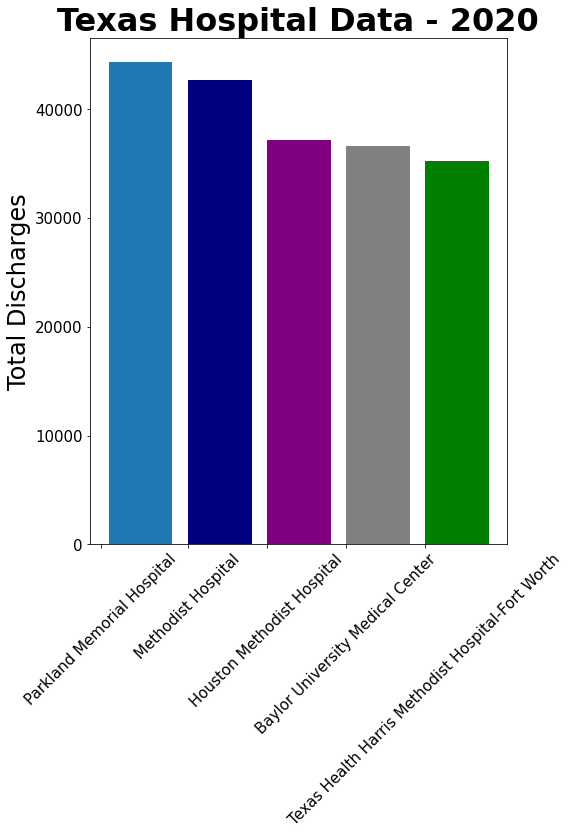

In [56]:
counts = tx_largest_20['Total Discharges']
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(tx_largest_20['Hospital_name'],counts)
# barlist[0].set_color('green')
barlist[1].set_color('navy')
barlist[2].set_color('purple')
barlist[3].set_color('grey')
barlist[4].set_color('green')
ax.set_ylabel('Total Discharges', size=24)
plt.title("Texas Hospital Data - 2020", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.xticks([-0.5, 0.6, 1.6, 2.6, 3.6],rotation=45)
plt.show()

In [57]:
houston_hospitals = df_20[df_20['Hospital_city'] == 'Houston']
htx_largest_20 = houston_hospitals.nlargest(5, ['Total Discharges'])
htx_largest_20

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
318,124000,Houston Methodist Hospital,Houston,201,9660,8211,9619,9675,37165.0
324,347000,Memorial Hermann - Texas Medical Center,Houston,201,8472,7190,8080,8628,32370.0
310,007000,Womans Hospital-Texas,Houston,201,6184,5906,6507,6399,24996.0
308,000105,UT MD Anderson Cancer Center,Houston,201,6842,4857,5615,6236,23550.0
322,302000,Memorial Hermann Memorial City Medical Center,Houston,201,6129,5036,5889,5987,23041.0


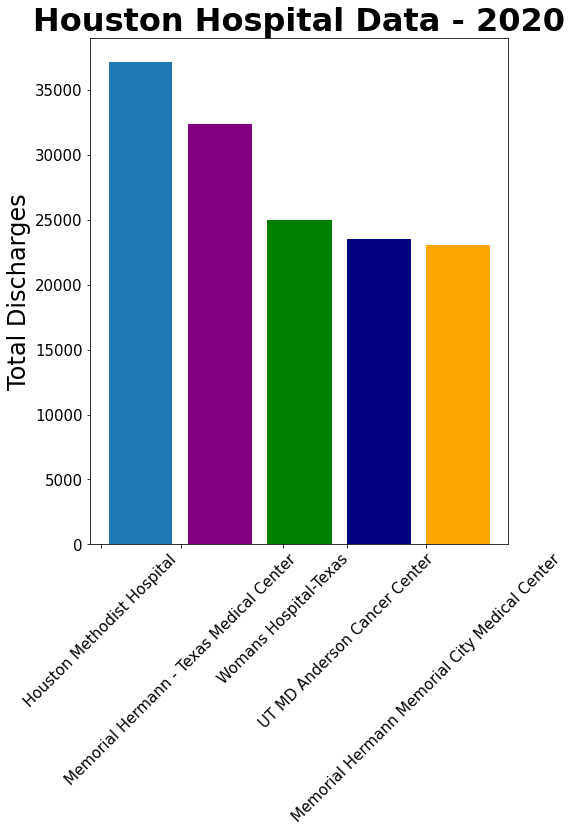

In [58]:
counts = htx_largest_20['Total Discharges']
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(htx_largest_20['Hospital_name'],counts)
# barlist[0].set_color('green')
barlist[1].set_color('purple')
barlist[2].set_color('green')
barlist[3].set_color('navy')
barlist[4].set_color('orange')
ax.set_ylabel('Total Discharges', size=24)
plt.title("Houston Hospital Data - 2020", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.xticks([-0.5, 0.51, 1.8, 2.6, 3.6],rotation=45)
plt.show()

In [59]:
len(houston_hospitals)

53

There are 53 hospitals in Houston, TX as of 2020. This was the last year that Texas Public Use has provided full annual numbers for. The largest hospitals in Houston are Houston Methodist, Memorial Hermann - Texas Medical Center, Womans Hospital, UT MD Anderson Cancer Center, and Memorial Hermann - Memorial City Medical Center. The smallest hospitals in Houston by discharges include HealthBridge Childrens, United Memorial Medical Center North, Altus, AD Hospital East, and Cobalt Rehabilitation Houston Heights.

In [60]:
houston_hospitals.nsmallest(5, ['Total Discharges'])

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
334,712500,HealthBridge Childrens Hospital-Houston,Houston,201,14,19,24,24,81.0
358,975402,United Memorial Medical Center North Hospital,Houston,201,32,8,64,22,126.0
354,975250,"Altus Houston Hospital, Celestial Hospital, Od...",Houston,201,52,40,72,75,239.0
350,975130,AD Hospital East,Houston,201,44,136,30,41,251.0
357,975397,Cobalt Rehabilitation Houston Heights,Houston,201,60,89,58,81,288.0


##### Preparing my dataset for time series analysis:
I'm going to aggregate the total discharges for the state of Texas for q1-q4 annually from 2005 to 2020. I will then plot them in a time series. I will compare with the population growth during this time. Assuming that discharges will scale proportionately with population growth, there should be an upward trend in discharges. This would imply that the population growth consisted of all ages and states of health. An important point to note is the missing values in each year's data. The distribution is skewed right, so the mean is higher than the median. I believe imputing values would be reckless given the distribution, looking at each case would be too time consuming, so I am just going to work with the data provided by the state of Texas. I do not believe imputing my own data would reflect on discharges accurately. From my EDA, there are generally around the same amount of null values from each year.

I manually got the quarterly totals for each year and then created a dataframe with the dates (q1 being 01, q2 being 04, q3 being 07, q4 being 10 in the month slot) and discharge totals. Since we have 4 per year for 16 years, there are a total of 64 data points for this time series. I have read online that >50 is acceptable.

In [61]:
df_17

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
0,091001,Abilene Regional Medical Center,Abilene,441,1873,1846,1744,1585,7048
1,500000,Hendrick Medical Center,Abilene,441,4493,4306,4424,4699,17922
2,920000,Healthsouth Rehab Hospital Abilene,Abilene,441,203,217,209,212,841
3,973240,Oceans Behavioral Hospital Abilene,Abilene,441,501,567,582,570,2220
4,973590,ContinueCare Hospital at Hendrick Medical Center,Abilene,441,43,50,44,58,195
...,...,...,...,...,...,...,...,...,...
713,781400,Winnie Community Hospital,Winnie,071,81,NaN,NaN,74,NaN
714,446001,Christus Mother Frances Hospital Winnsboro,Winnsboro,499,105,74,77,71,327
715,151000,North Runnels Hospital,Winters,399,37,25,16,29,107
716,569000,Tyler County Hospital,Woodville,457,101,97,94,111,403


In [62]:
# col name changes at '17
print(df_05['1q05 Inpatient Discharges'].sum())
print(df_05['2q05 Inpatient Discharges'].sum())
print(df_05['3q05 Inpatient Discharges'].sum())
print(df_05['4q05 Inpatient Discharges'].sum())

print(df_06['1q06 Inpatient Discharges'].sum())
print(df_06['2q06 Inpatient Discharges'].sum())
print(df_06['3q06 Inpatient Discharges'].sum())
print(df_06['4q06 Inpatient Discharges'].sum())

print(df_07['1q07 Inpatient Discharges'].sum())
print(df_07['2q07 Inpatient Discharges'].sum())
print(df_07['3q07 Inpatient Discharges'].sum())
print(df_07['4q07 Inpatient Discharges'].sum())

print(df_08['1q08 Inpatient Discharges'].sum())
print(df_08['2q08 Inpatient Discharges'].sum())
print(df_08['3q08 Inpatient Discharges'].sum())
print(df_08['4q08 Inpatient Discharges'].sum())

print(df_09['1q09 Inpatient Discharges'].sum())
print(df_09['2q09 Inpatient Discharges'].sum())
print(df_09['3q09 Inpatient Discharges'].sum())
print(df_09['4q09 Inpatient Discharges'].sum())

print(df_10['1q10 Inpatient Discharges'].sum())
print(df_10['2q10 Inpatient Discharges'].sum())
print(df_10['3q10 Inpatient Discharges'].sum())
print(df_10['4q10 Inpatient Discharges'].sum())

print(df_11['1q11 Inpatient Discharges'].sum())
print(df_11['2q11 Inpatient Discharges'].sum())
print(df_11['3q11 Inpatient Discharges'].sum())
print(df_11['4q11 Inpatient Discharges'].sum())

print(df_12['1q12 Inpatient Discharges'].sum())
print(df_12['2q12 Inpatient Discharges'].sum())
print(df_12['3q12 Inpatient Discharges'].sum())
print(df_12['4q12 Inpatient Discharges'].sum())

print(df_13['1q13 Inpatient Discharges'].sum())
print(df_13['2q13 Inpatient Discharges'].sum())
print(df_13['3q13 Inpatient Discharges'].sum())
print(df_13['4q13 Inpatient Discharges'].sum())

print(df_14['1q14 Inpatient Discharges'].sum())
print(df_14['2q14 Inpatient Discharges'].sum())
print(df_14['3q14 Inpatient Discharges'].sum())
print(df_14['4q14 Inpatient Discharges'].sum())

print(df_15['1q15 Inpatient Discharges'].sum())
print(df_15['2q15 Inpatient Discharges'].sum())
print(df_15['3q15 Inpatient Discharges'].sum())
print(df_15['4q15 Inpatient Discharges'].sum())

print(df_16['1q16 Inpatient Discharges'].sum())
print(df_16['2q16 Inpatient Discharges'].sum())
print(df_16['3q16 Inpatient Discharges'].sum())
print(df_16['4q16 Inpatient Discharges'].sum())

print(df_17['q1'].sum())
print(df_17['q2'].sum())
print(df_17['q3'].sum())
print(df_17['q4'].sum())

print(df_18['q1'].sum())
print(df_18['q2'].sum())
print(df_18['q3'].sum())
print(df_18['q4'].sum())

print(df_19['q1'].sum())
print(df_19['q2'].sum())
print(df_19['q3'].sum())
print(df_19['q4'].sum())

print(df_20['q1'].sum())
print(df_20['q2'].sum())
print(df_20['q3'].sum())
print(df_20['q4'].sum())

715593.0
704780.0
714624.0
719340.0
732873.0
717374.0
733572.0
733369.0
740288.0
724901.0
738151.0
734430.0
738795.0
715623.0
732680.0
731455.0
737678.0
733240.0
735252.0
740985.0
740573.0
725658.0
736262.0
741885.0
740817.0
724552.0
740270.0
731940.0
745203.0
725194.0
751939.0
743625.0
731187.0
719370.0
730714.0
729582.0
728958.0
724278.0
744613.0
749342.0
763656
764036
770203
770199
767347
760654
782382
778595
776554
761921
760904
789700
788843
766327
773941
781185
774564
775301
789509
801901
774322
672387
740900
758295


In [63]:
totals_a = [
715593.0,704780.0,714624.0,719340.0,732873.0,717374.0,733572.0,733369.0,740288.0,724901.0,738151.0,734430.0,738795.0,715623.0,
732680.0,731455.0,737678.0,733240.0,735252.0,740985.0,740573.0,725658.0,736262.0,741885.0,740817.0,724552.0,740270.0,731940.0,
745203.0,725194.0,751939.0,743625.0,731187.0,719370.0,730714.0,729582.0,728958.0,724278.0,744613.0,749342.0,763656,764036,
    770203,770199,767347,760654,782382,778595,776554,761921,760904,789700,788843,766327,773941,781185,
    774564,775301,789509,801901,774322,672387,740900,758295
]

In [64]:
Discharges=[]
for item in totals_a:
    Discharges.append(float(item))
print(Discharges)

[715593.0, 704780.0, 714624.0, 719340.0, 732873.0, 717374.0, 733572.0, 733369.0, 740288.0, 724901.0, 738151.0, 734430.0, 738795.0, 715623.0, 732680.0, 731455.0, 737678.0, 733240.0, 735252.0, 740985.0, 740573.0, 725658.0, 736262.0, 741885.0, 740817.0, 724552.0, 740270.0, 731940.0, 745203.0, 725194.0, 751939.0, 743625.0, 731187.0, 719370.0, 730714.0, 729582.0, 728958.0, 724278.0, 744613.0, 749342.0, 763656.0, 764036.0, 770203.0, 770199.0, 767347.0, 760654.0, 782382.0, 778595.0, 776554.0, 761921.0, 760904.0, 789700.0, 788843.0, 766327.0, 773941.0, 781185.0, 774564.0, 775301.0, 789509.0, 801901.0, 774322.0, 672387.0, 740900.0, 758295.0]


In [65]:
dates_a = [
    '01/01/2005','04/01/2005','07/01/2005','10/01/2005',
    '01/01/2006','04/01/2006','07/01/2006','10/01/2006',
    '01/01/2007','04/01/2007','07/01/2007','10/01/2007',
    '01/01/2008','04/01/2008','07/01/2008','10/01/2008',
    '01/01/2009','04/01/2009','07/01/2009','10/01/2009',
    '01/01/2010','04/01/2010','07/01/2010','10/01/2010',
    '01/01/2011','04/01/2011','07/01/2011','10/01/2011',
    '01/01/2012','04/01/2012','07/01/2012','10/01/2012',
    '01/01/2013','04/01/2013','07/01/2013','10/01/2013',
    '01/01/2014','04/01/2014','07/01/2014','10/01/2014',
    '01/01/2015','04/01/2015','07/01/2015','10/01/2015',
    '01/01/2016','04/01/2016','07/01/2016','10/01/2016',
    '01/01/2017','04/01/2017','07/01/2017','10/01/2017',
    '01/01/2018','04/01/2018','07/01/2018','10/01/2018',
    '01/01/2019','04/01/2019','07/01/2019','10/01/2019',
    '01/01/2020','04/01/2020','07/01/2020','10/01/2020',
]

In [66]:
txhospitals_timeseries = pd.DataFrame(list(zip(dates_a, Discharges)), columns=['Date', 'Discharges'])

THE BISCUIT HAS BEEN BUTTERED

In [67]:
txhospitals_timeseries['Date'] = pd.to_datetime(txhospitals_timeseries['Date'])
txhospitals_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        64 non-null     datetime64[ns]
 1   Discharges  64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [68]:
txhospitals_timeseries.set_index('Date', inplace=True)

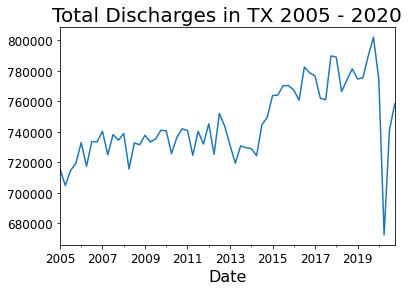

In [69]:
txhospitals_timeseries.plot(legend=None)
plt.title('Total Discharges in TX 2005 - 2020', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
rolling_mean = txhospitals_timeseries.rolling(window=4).mean()
plt.plot(rolling_mean);

I have taken data from 2 different sources. One source was the Texas website which had population data for each year but stopped at 2017, and the other was the U.S. census which has population data for the end of each decade. https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html
https://www.tsl.texas.gov/ref/abouttx/census.html

In 2005, there were 22,928,508 people in Texas. In 2019, there were 29,092,190 people for an estimated growth of 26.9%. In 2020, there were 29,145,505 for an estimated growth of 27.1%. Q4 2005 (to avoid seasonality in illness) showed 719,340 discharges while the peak, Q4 2019, showed 801,901 discharges for an increase of 11.5% in discharges. In 2020, numbers showed greater variance due to the onset of Covid. Q4 2020 showed 758,295 for an increase of 5.4% in discharges. Much of the population growth may be healthy population or younger members of society less prone to stays in the hospital.

The data currently has an upward trend as we expected and is not stationary.

In [70]:
# txhospitals_timeseries.to_csv('tx_hospital_discharges.csv')